# Introduction to Computer Programming

## Week 8.2: Curve Fitting 

* * *

<img src="img/full-colour-logo-UoB.png" alt="Bristol" style="width: 300px;"/>

It can be useful to define a relationship between two variables, x and y. 

We often want to 'fit' a function to a set of data points (e.g. experimental data).

Python has several tools (e.g. Numpy and Scipy packages) for finding relationships in a set of data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='LinearRegression'></a>
# Linear Regression
Linear regression calculates a __linear function__ that minimizes the combined error between the fitted line and the data points. 

<img src="img/linear_regression.png" alt="Drawing" style="width: 300px;"/>

A __linear function__ has the form:
$$
y = mx + c
$$

<a id='FittingPolynomialFunction'></a>
# Fitting a polynomial function

>*__Polynomial function__: a function involving only non-negative integer powers of x.*

__1st order polynomial__ &nbsp; &nbsp; $y = \mathrm{a}x^1 + \mathrm{b}x^0$
<br>(linear function)

__2nd order polynomial__ &nbsp; &nbsp; $y = \mathrm{c}x^2 + \mathrm{d}x^1 + \mathrm{e}x^0$

__3rd order polynomial__ &nbsp; &nbsp; $y = \mathrm{f}x^3 + \mathrm{g}x^2 + \mathrm{h}x^1 + \mathrm{i}x^0$


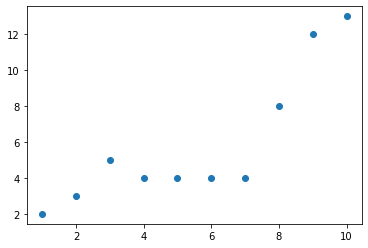

In [84]:
x = np.array([1, 6, 3, 4, 10, 2, 7, 8, 9, 5])
y = np.array([2, 4, 5, 4, 13, 3, 4, 8, 12, 4])
plt.plot(x,y,'o')

A polynomial curve can be fitted using the `numpy.polyfit` function. 

Function arguments: 
- independent variables 
- dependent variables 
- order of the polynomial 

`polyfit` function returns the coefficients of each term of the polynomial.

In [50]:
a, b = np.polyfit(x, y, 1)     # 1st order poly
 
c, d, e = np.polyfit(x, y, 2)  # 2nd order poly

print(a, b)
print(c, d, e)

1.0727272727272728 -5.61733354972272e-15
0.19318181818181812 -1.0522727272727261 4.249999999999994


It can be more convenient to store the coefficients as a data structure:
- for higher order polynomials
- for genertaed the fitted curve

In [51]:
coeffs_1 = np.polyfit(x, y, 1) # 1st order poly 

coeffs_2 = np.polyfit(x, y, 2) # 2nd order poly

print(coeffs_1)
print(coeffs_2[0], coeffs_2[1], coeffs_2[2])

[ 1.07272727e+00 -5.61733355e-15]
0.19318181818181812 -1.0522727272727261 4.249999999999994


### Generating the Fitted Curve with
To produce a polynomial function using the generated coeffients, we can use the function . 
 `numpy.poly1D`
<br>x values from original data (sorted monotonically for line plot)  
<br>y values are generated using the fitted function

x values, sorted monotonically

In [62]:
x_new = np.array(sorted(x))

Fitted y values 

In [63]:
# 1st order polynomial
yfit1 = np.poly1d(coeffs_1)(x_new)

# 2nd order polynomial
yfit2 = np.poly1d(coeffs_2)(x_new)

Note, that this produces the same output as:

In [64]:
yfit1 = coeffs_1[0]*x_new + coeffs_1[1]

yfit2 = coeffs_2[0]*x_new**2 + coeffs_2[1]*x_new + coeffs_2[2]

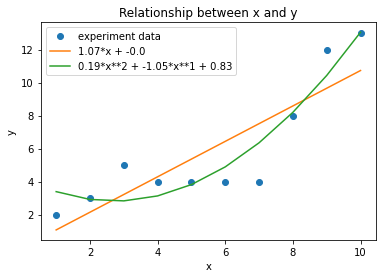

In [65]:
# scatter plot of raw data
plt.plot(x, y, 'o', label='experiment data')


# fitted polynomial functions  
plt.plot(x_new, yfit1, 
         label=f'{round(coeffs_1[0],2)}*x + {round(coeffs_1[1],2)}');
plt.plot(x_new, yfit2,  
         label=f'{round(coeffs_2[0],2)}*x**2 + {round(coeffs_2[1],2)}*x**1 + {round(coeffs[2],2)}');


# 'label' used to display the equation of the line as the legend
plt.legend()


# label the axes
plt.xlabel('x')
plt.ylabel('y')


# add a title 
plt.title('Relationship between x and y');

<a id='RMSE'></a>
__Question:__ Which line best fits the data? 

Sometimes we need a metric to assess the "goodness of fit". 

<a id='RootMeanSquareError'></a>
# Root Mean Square Error (RMSE)

A widely used measure of the differences between predicted/fitted values and real values/ raw data. 

__Error/residual, $\varepsilon$:__ the difference between the observed value $y(x)$ and the fitted value $a(x)$. 

$$
\varepsilon = a(x) - y(x)
$$

For $N$ data points, the *sum* of the squared errors is 

$$S = \sum_{i=1}^{N}\varepsilon_i^2$$

The RMSE is computed as

$$RMSE=\sqrt{\frac{1}{N}S}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}{\varepsilon_i^2}}$$

Smaller RMSE indictes a better fit between raw and fitted data. 

We can optimise the fitted function by minimising the RMSE.

This optimisation method is often referred to as the *least squares* approach. 


Error, $\varepsilon_i = a(x_i) - y_i$

RMSE, $=\sqrt{\frac{1}{N}\sum_{i=1}^{N}{\varepsilon_i^2}}$

In [91]:
def RMSE(x, y, yfit):
    "Returns the RMSE of a polynomial of specified order fitted to x-y data"
    e = (yfit - y) # error
    return np.sqrt(np.sum(e**2)/ len(x)) # RMSE

Let's compare the RMSE of each fitted polynomial 

In [92]:
for order in range(1, 3):
    coeffs = np.polyfit(x, y, order) # coefficients of fitted polynomial
    yfit = np.poly1d(coeffs)(x) # no need for monotonic values if not plotting line
    print(RMSE(x,y,yfit))

1.8964080880347554
1.2751114033327013


The second order polynomial gives a better fit. 

__Note:__ 
- Matplot lib automatically changes the colour of the line each time you plot. 
- This is much shorter than repeatedly writig out the code to plot each line of the figure.

<a id='FittingArbitraryFunction'></a>
# Fitting an Arbitrary Function

Curve fitting is not limited to polynomial functions. 

We can fit any function with unknown constants to the data using the function `curve_fit` from the `scipy` package.



We first define a function that we want to fit e.g.
$$y = a e^{bx}$$

We write the function in the following format. 


In [94]:
def exponential(x, a, b): # input arguments are independent variable unknown constants 
    y = a * np.exp(b*x)   
    return y              

`curve_fit` takes three input arguments:
 - the function to fit (in the format above)
 - the independent variable
 - the dependent variable
 

`curve_fit` returns two arguments:

 - the constants in the fitted function
 - the covariance of the parameters (a statistical measure of accuracy)

In [98]:
from scipy.optimize import curve_fit

opt, cov = curve_fit(exponential, x, y) # get optimised constants

yfit = exponential(x, *opt)             # input optimised constants to function to get fitted data

rmse = RMSE(x, y, yfit)                 # find RMSE

print(f'RMSE = {rmse}')

RMSE = 1.3338248760975377


# Summary
<a id='Summary'></a>
- Matplotlib can be used to produce a wide range of styles of figures and plots of your data.
- The matplotlib library can be used to quicky produce simple plots to visualise and check your solutions to mathematical problems.
- This includes fitting a curve or a relationship to data imported from a delimted text file.
- Simple line and scatter plots can be customised using a `formatstring`
- Additional features such as a figure legend and axis labels can be set as arguments when creating plots.


Online resources for more Matplotlib functionality:
 - Matplotlib Gallery (http://matplotlib.org/gallery.html)
 - Github (http://gree2.github.io/python/2015/04/10/python-matplotlib-plotting-examples-and-exercises)
 
 

<a id='ReviewExercises'></a>
# 7. Review Exercises

Compete the exercises below.

### Review Exercise 1: Curve Fitting

The experimental data in `sample_data/signal_data.csv` resembles the function:

$$y = a \sin(x +b)$$

$a$ and $b$ are unknown constants.

1. Import the data from the file `sample_data/signal_data.csv`

1. Use `curve_fit` to find optimal values of $a$ and $b$.

1. Plot the raw data and the fitted data on the same graph. Label the data and include a legend.
1. Calculate the root mean square error (RMSE) of the fitted data and show the computed value as the plot title. 
1. Print the equation of the fitted line.
1. Save the figure in the sample_data folder as a .pdf file.

__Use comments in your code to explain what each part does.__


In [ ]:
# Review Exercise 1: Curve Fitting

In [ ]:
# Review Exercise 2: Interpolation

## Review Exercise 3: Importing .csv Data and Working with Arrays

The file `sample_data/douglas_data.csv` contains a data set of recorded parameters for a sample of wooden beams.

__Part A : Importing data__
<br>Open the file and look at the data. 
What is the delimiter used?
Which rows and columns contain non-numeric data? 

Import the data using `np.loadtxt`, setting the data type to float. 
<br>Exclude the rows and columns containing non-numeric data.

*Remember : The use of scientific notation can be surpressed by:*

        np.set_printoptions(suppress=True)
        
__Part B : Manipulating Data__
<br>Select the first 10 rows of the array to create a new array.

The data in the last column is in units $\mathrm{N/mm}^2$. 

Convert the data in this column to units $\mathrm{N/m}^2$.

The area of each beam in the data set is 0.01 $\mathrm{m^2}$.
<br>The density of each beam is given in the fifth column. 
<br>The height of each beam is given in the sixth column. 
<br>Add a new column to the array that contains mass of each beam (kg) using:

__mass = area $\times$ height $\times$ density__


__Part C : Displaying Data__
<br>Print the mass of the 1st beam in the array.
<br>Print a string to indicate what this value means e.g.
                
       The mass of beam 1 is ...
       
<br>Print the data in odd numbered columns of row 5. 


In [ ]:
# Review Exercise 3A: Importing .csv Data and Working with Arrays

In [ ]:
# Review Exercise 3B :Manipulating Data

In [ ]:
# Review Exercise 3C: Displaying Data